<a href="https://colab.research.google.com/github/BenyaminZojaji/Deep_Learning/blob/main/Assignment%202/cfar10/CNN_MLP_cfar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

### Import libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback

### wandb configuration

In [37]:
wandb.init(project="CNN--MLP-cfar10", entity="benyaminzojaji")

accuracy,▁▄▅▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▂▁▁
val_accuracy,▁▄▆▆▆█▇███
val_loss,█▅▃▃▃▁▂▁▁▂
accuracy,0.78629
best_epoch,8
best_val_loss,0.83894
epoch,9
loss,0.61172
val_accuracy,0.706


In [38]:
config = wandb.config
config.learning_rate = 0.1

### Dataset

In [29]:
cfar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cfar10.load_data()

# normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=24)

### Verify the data

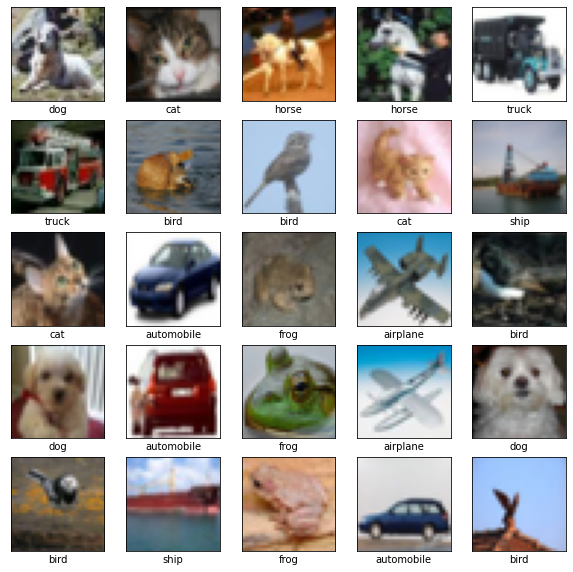

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()


### MLP

In [36]:
model = tf.keras.models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), callbacks=[WandbCallback()])

Epoch 1/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9306 - accuracy: 0.3060 - val_loss: 1.8361 - val_accuracy: 0.3320 - _timestamp: 1646472401.0000 - _runtime: 58.0000
Epoch 2/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8161 - accuracy: 0.3557 - val_loss: 1.8173 - val_accuracy: 0.3430 - _timestamp: 1646472406.0000 - _runtime: 63.0000
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7696 - accuracy: 0.3706 - val_loss: 1.7630 - val_accuracy: 0.3536 - _timestamp: 1646472410.0000 - _runtime: 67.0000
Epoch 4/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7392 - accuracy: 0.3810 - val_loss: 1.7245 - val_accuracy: 0.3730 - _timestamp: 1646472414.0000 - _runtime: 71.0000
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7229 - accuracy: 0.3855 - val_loss: 1.7163 - val_accuracy: 0.3838 - _timestamp: 1646472418.0000 - _runtime: 75.0000
Epoch 6/10
1407/1407 [========

In [41]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6533 - accuracy: 0.4115


[1.653300166130066, 0.4115000069141388]

In [42]:
model.save('mlp-cfar10.h5')

### CNN+MLP

In [31]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), callbacks=[WandbCallback()])

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5473 - accuracy: 0.4348 - val_loss: 1.2584 - val_accuracy: 0.5504 - _timestamp: 1646472141.0000 - _runtime: 32.0000
Epoch 2/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.1789 - accuracy: 0.5799 - val_loss: 1.0936 - val_accuracy: 0.6096 - _timestamp: 1646472147.0000 - _runtime: 38.0000
Epoch 3/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.0182 - accuracy: 0.6430 - val_loss: 0.9761 - val_accuracy: 0.6548 - _timestamp: 1646472154.0000 - _runtime: 45.0000
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9206 - accuracy: 0.6787 - val_loss: 0.9535 - val_accuracy: 0.6606 - _timestamp: 1646472160.0000 - _runtime: 51.0000
Epoch 5/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.8503 - accuracy: 0.7039 - val_loss: 0.9486 - val_accuracy: 0.6670 - _timestamp: 1646472166.0000 - _runtime: 57.0000
Epoch 6/10
1407/1407 [========

In [34]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8973 - accuracy: 0.7007


[0.8972917199134827, 0.7006999850273132]

In [35]:
model.save('cnn-mlp-cfar10.h5')